In [1]:
### Correlation

In [2]:
#Dependencies
#conda install reportlab
import pandas as pd
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import itertools

In [3]:
#constants
markersize = 2
min_wv = 350
max_wv = 998
lunar_dataset_used = "The Impact dataset 0 deg"
solar_dataset_used = "ASTM dataset"

In [4]:
#report path
report_location = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\report\The Impact Datasets"

#code name samples path
code_name_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\TRANSFLECTANCIA NOV 23\CODE NAME SAMPLES.txt"

#optical properties datapath
transflectance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\new_data\2023NOV_TRANSFLECTANCE\transflectance\average"
transmittance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data\transmittance"
absorptance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data\absorptance"
reflectance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\clean_data\reflectance"

#Solar spectral irradiance datapath
solar_irradiance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\reflectivity\ASTM G173-03 (2020).txt"
#lunar_irradiance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\report\moon_spectral_irradiance_ROLO_model.txt"
lunar_irradiance_data_path = r"C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\spectral irradiance\spectral irradiance of the moon\The Impact datasets\df_0.txt"


In [5]:
def list_files_in_folder(folder_path):
    files_only_in_folder = []
    
    # Get the list of all files in the folder and its subfolders
    all_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            all_files.append(os.path.join(root, file))
    
    # Get the list of files that are only in the top-level folder
    for file in all_files:
        if os.path.isfile(file) and os.path.dirname(file) == folder_path:
            files_only_in_folder.append(file)
    
    return files_only_in_folder

In [6]:
transflectance_file_list = list_files_in_folder(transflectance_data_path)
transmittance_file_list = list_files_in_folder(transmittance_data_path)
absorptance_file_list = list_files_in_folder(absorptance_data_path)
reflectance_file_list = list_files_in_folder(reflectance_data_path)
irradiance_file_list = [solar_irradiance_data_path]
for file in irradiance_file_list: 
    print(file)
print(len(transmittance_file_list))
print(len(absorptance_file_list))
print(len(irradiance_file_list))

C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\reflectivity\ASTM G173-03 (2020).txt
22
22
1


In [7]:
def read_dataframes(file_path_list, header_num, measurement_type1, measurement_type2=None): 
    dataframes = []
    
    for file_path in file_path_list:
        if measurement_type2 is None:
            # For a single measurement type
            df = pd.read_csv(file_path, sep='\t', header=header_num, names=['wavelength', measurement_type1, "sample"]).dropna()
            
            #print(df)
            # Replace commas with dots
            df = df.replace(',','.', regex=True)
            
            # Add columns and convert types
            df["file"] = file_path
            #df["sample"] = os.path.basename(file_path).replace("-RX", "").replace(".txt", "").replace("_AVERAGE", "").replace("-TX", "").replace("-AX", "")
            df["measurement_type"] = measurement_type1
            df['wavelength'] = df['wavelength'].astype(float)
            df[measurement_type1] = df[measurement_type1].astype(float)
        else:
            # For two measurement types
            df = pd.read_csv(file_path, sep='\t', header=header_num, names=['wavelength', measurement_type1, measurement_type2]).dropna()
            
            # Replace commas with dots
            df = df.replace(',','.', regex=True)
            
            # Add columns and convert types
            df["file"] = file_path
            df["sample"] = os.path.basename(file_path)
            df["measurement_type"] = f"{measurement_type1}_{measurement_type2}"
            df['wavelength'] = df['wavelength'].astype(float)
            df[measurement_type1] = df[measurement_type1].astype(float)
            df[measurement_type2] = df[measurement_type2].astype(float)
        
        # Append the dataframe to the list
        dataframes.append(df)
        
    return dataframes


In [8]:
reflectance_file_list

['C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\clean_data\\reflectance\\C.AURI.INBI-RX.txt',
 'C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\clean_data\\reflectance\\C.BOUC.CO23-RX.txt',
 'C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\clean_data\\reflectance\\C.BOUC.INB5423-RX.txt',
 'C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\clean_data\\reflectance\\C.BOUC.INB5610-RX.txt',
 'C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\clean_data\\reflectance\\C.CHRY.6713-RX.txt',
 'C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\clean_data\\reflectance\\C.CHRY.MV73-RX.txt',
 'C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\clean_data\\reflectance\\C.CHRY.MV84-RX.txt',
 'C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\clean_data\\reflectance\\C.CUPR.MV23-RX.txt',
 'C:\\Users\\EstebanSoto\\Documents\\Estudio Optico Escarabajos\\clean_data\\reflectance\\C.KALI.LA22-RX.t

## Dataframes 

In [9]:
reflectance_dfs = read_dataframes(reflectance_file_list,0, "reflectance")
transmittance_dfs = read_dataframes(transmittance_file_list,0, "transmittance")
absorptance_dfs = read_dataframes(absorptance_file_list,0, "absorptance")
irradiance_dfs = pd.read_csv(solar_irradiance_data_path, sep='\t', header=1, names=['wavelength',"hemispherical_irr", "irradiance"], usecols = ["wavelength", "irradiance"]).dropna()

In [10]:
irradiance_dfs

,wavelength,irradiance
0,280.0,2.540000e-26
1,280.5,1.090000e-24
2,281.0,6.130000e-24
3,281.5,2.750000e-22
4,282.0,2.830000e-21
...,...,...
1723,2610.0,0.000000e+00
1724,2615.0,0.000000e+00
1725,2620.0,0.000000e+00
1726,2625.0,0.000000e+00


In [11]:
# Test 

In [12]:
sample_consolidated_df = pd.DataFrame([])

for df in reflectance_dfs:
    if df["sample"].iloc[0] == "C.AURI.INBI" :
        sample_consolidated_df["reflectance"] = df["reflectance"]
        sample_consolidated_df["wavelength"] = df["wavelength"]
        print(True)
sample_consolidated_df
        
#sample_consolidated_df

for df in transmittance_dfs:
    if df["sample"].iloc[0] == "C.AURI.INBI" :
        sample_consolidated_df["transmittance"] = df["transmittance"]
        print(True)
sample_consolidated_df

for df in absorptance_dfs:
    if df["sample"].iloc[0] == "C.AURI.INBI" :
        sample_consolidated_df["absorptance"] = df["absorptance"]
        print(True)
        
sample_consolidated_df =sample_consolidated_df.dropna()
sample_consolidated_df["total"] = sample_consolidated_df["absorptance"]+sample_consolidated_df["transmittance"]+sample_consolidated_df["reflectance"]
print(sample_consolidated_df[sample_consolidated_df["total"]<110].sort_values(by="wavelength", ascending=True))

True
True
True
      reflectance  wavelength  transmittance  absorptance  total
0        5.886583       256.0       0.331562    93.781855  100.0
1        5.870086       257.0       0.330087    93.799827  100.0
2        5.839215       258.0       0.331627    93.829158  100.0
3        5.810737       259.0       0.331079    93.858183  100.0
4        5.777950       260.0       0.331904    93.890146  100.0
...           ...         ...            ...          ...    ...
1740    14.775769      1996.0      55.608428    29.615803  100.0
1741    14.921706      1997.0      55.656792    29.421502  100.0
1742    15.245528      1998.0      55.691217    29.063255  100.0
1743    15.455754      1999.0      55.679737    28.864509  100.0
1744    15.532976      2000.0      55.764685    28.702340  100.0

[1745 rows x 5 columns]


In [13]:
## Filter dataframes by range 
def filter_dataframes_by_range(dataframe_list, min_wv, max_wv):
    new_list = []
    for df in dataframe_list: 
        #print(df)
        new_df = df[(df["wavelength"]  >= min_wv) & (df["wavelength"]<= max_wv)]
        #print(new_df)
        new_list.append(new_df.reset_index())
    
    return new_list

In [14]:
irradiance_dfs

,wavelength,irradiance
0,280.0,2.540000e-26
1,280.5,1.090000e-24
2,281.0,6.130000e-24
3,281.5,2.750000e-22
4,282.0,2.830000e-21
...,...,...
1723,2610.0,0.000000e+00
1724,2615.0,0.000000e+00
1725,2620.0,0.000000e+00
1726,2625.0,0.000000e+00


In [15]:

reflectance_dfs = filter_dataframes_by_range(reflectance_dfs, min_wv, max_wv)
transmittance_dfs = filter_dataframes_by_range(transmittance_dfs, min_wv, max_wv)
absorptance_dfs = filter_dataframes_by_range(absorptance_dfs, min_wv, max_wv)
irradiance_dfs =  filter_dataframes_by_range([irradiance_dfs], min_wv, max_wv)

<Axes: xlabel='wavelength'>

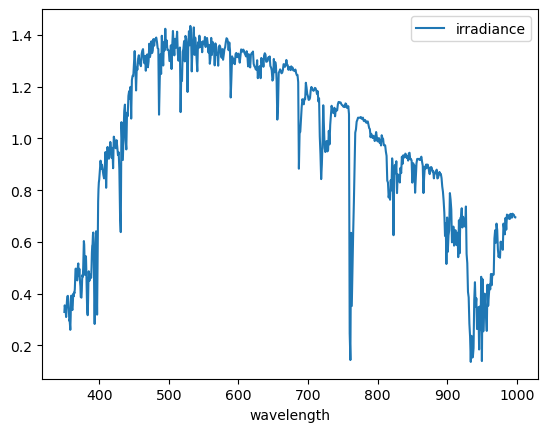

In [16]:
irradiance_dfs[0].plot(x="wavelength", y = "irradiance")

In [17]:
new_irradiance_dfs = []
for df in irradiance_dfs:
    #Interpolate values
    wavelength_list = pd.DataFrame(np.linspace(min_wv ,max_wv , num=max_wv-min_wv+1), columns=["wavelength"]) 
    #print(df)
    interpolated_df = pd.DataFrame([])
    interpolated_df["irradiance"] = np.interp(wavelength_list['wavelength'], df['wavelength'], df['irradiance'])
    new_irradiance_dfs.append(interpolated_df)
    

## Optical Properties By Range

In [18]:
optical_properties = pd.DataFrame([])

In [19]:
def get_optical_property(measurement_type):
    switch_dict = {
        'transmittance': 'transmittivity',
        'reflectance': 'reflectivity',
        'absorptance': 'absorptivity'
    }

    return switch_dict.get(measurement_type, 'optical_property')

In [20]:
#filtered_irradiance_dfs = filter_dataframes_by_range(min_wv, max_wv, irradiance_dfs)
for df in irradiance_dfs:
    print(df.sort_values(by="irradiance", ascending=False).sum()) 

index         341811.0000
wavelength    456176.0000
irradiance       663.2059
dtype: float64


# Solar

In [21]:
def optical_properties_by_range(optical_property_dfs, irradiance_df, measurement_type):
    
    properties = []

    for optical_property_df in optical_property_dfs:
        #print(len(optical_property_df))
        for irradiance_df in irradiance_dfs:
            print("irr len")
            print(len(irradiance_df))
            #print(optical_property_df)
            # Calculate total irradiance
            sum_irradiance = irradiance_df['irradiance'].sum()
            #print(sum_irradiance)
            # Interpolate irradiance data to match the wavelength values of optical property data
            #interpolated_irradiance = np.interp(optical_property_df['wavelength'], irradiance_df['wavelength'], irradiance_df['normal_irradiance'], left=0, right=0)

            # Calculate the multiplied values
            result_intensity = optical_property_df[measurement_type]/100 * irradiance_df['irradiance']

            # Create a new DataFrame with the multiplied values
            result_dataset = pd.DataFrame({'wavelength': optical_property_df['wavelength'], measurement_type: result_intensity, 'sample': optical_property_df['sample']})

            # Calculate sum of optical property
            sum_optical_property = result_dataset.groupby('sample')[measurement_type].sum()
            #print(sum_optical_property[0])
            
            # Calculate the optical property value
            optical_property = get_optical_property(measurement_type)
            result = {'sample': optical_property_df['sample'].iloc[0], optical_property: sum_optical_property[0] / sum_irradiance}
            #print(result["sample"])
            properties.append(result)

    properties_df = pd.DataFrame(properties, columns=['sample', optical_property]).sort_values(by=optical_property, ascending=False)
    return properties_df

## Solar Reflectivity, Transmittivity and Absorptivity

In [22]:
#Full range
min_wv = 350 #nm
max_wv = 998 #nm

reflectivity = optical_properties_by_range(reflectance_dfs, irradiance_dfs, "reflectance")
transmittivity = optical_properties_by_range(transmittance_dfs, irradiance_dfs, "transmittance")
absorptivity = optical_properties_by_range(absorptance_dfs, irradiance_dfs, "absorptance")
print(reflectivity)
solar_optical_properties = reflectivity
solar_optical_properties["transmittivity"] = transmittivity["transmittivity"]
solar_optical_properties["absorptivity"] = absorptivity["absorptivity"]
print(solar_optical_properties)

irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
irr len
699
            sample  reflectivity
10     C.RESP.MV23      0.566526
8      C.KALI.LA22      0.516044
9      C.OPTI.8.17      0.459333
5      C.CHRY.MV73      0.442723
6      C.CHRY.MV84      0.405537
7      C.C

C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_18756\2462989646.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = {'sample': optical_property_df['sample'].iloc[0], optical_property: sum_optical_property[0] / sum_irradiance}
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_18756\2462989646.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = {'sample': optical_property_df['sample'].iloc[0], optical_property: sum_optical_property[0] / sum_irradiance}
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_18756\2462989646.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecat

## Lunar absorptivity, transmittivity and reflectivity

In [23]:
print(dir(irradiance_dfs))

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [24]:
#Full range

irradiance_df = pd.read_csv(lunar_irradiance_data_path, sep='\t', header=0, names=['wavelength', "irradiance"], usecols = ["wavelength", "irradiance"]).dropna()
irradiance_df_list = [irradiance_df]
irradiance_dfs =  filter_dataframes_by_range(irradiance_df_list, min_wv, max_wv, )



In [25]:
min_wv = 350 #nm
max_wv = 998 #nm

reflectivity = optical_properties_by_range(reflectance_dfs, irradiance_dfs, "reflectance")
transmittivity = optical_properties_by_range(transmittance_dfs, irradiance_dfs, "transmittance")
absorptivity = optical_properties_by_range(absorptance_dfs, irradiance_dfs, "absorptance")
print(reflectivity)
lunar_optical_properties = reflectivity
lunar_optical_properties["transmittivity"] = transmittivity["transmittivity"]
lunar_optical_properties["absorptivity"] = absorptivity["absorptivity"]
print(lunar_optical_properties)

irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
irr len
649
            sample  reflectivity
10     C.RESP.MV23      0.564038
8      C.KALI.LA22      0.512975
9      C.OPTI.8.17      0.469019
5      C.CHRY.MV73      0.452464
6      C.CHRY.MV84      0.415939
18       P

C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_18756\2462989646.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = {'sample': optical_property_df['sample'].iloc[0], optical_property: sum_optical_property[0] / sum_irradiance}
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_18756\2462989646.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = {'sample': optical_property_df['sample'].iloc[0], optical_property: sum_optical_property[0] / sum_irradiance}
C:\Users\EstebanSoto\AppData\Local\Temp\ipykernel_18756\2462989646.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecat

In [26]:
irradiance_df

,wavelength,irradiance
0,301.0,0.554743
1,302.0,0.590432
2,303.0,0.675799
3,304.0,0.780051
4,305.0,0.760116
...,...,...
895,1196.0,2.083854
896,1197.0,2.078855
897,1198.0,2.066835
898,1199.0,2.037060


In [27]:
#consolidated


In [28]:
def save_dataframe_as_text(reflectance_df, path, new_filename):
    """
    Save DataFrame as a tab-delimited text file.

    Parameters:
        reflectance_df (pandas.DataFrame): DataFrame to be saved.
        path (str): Directory path where the file will be saved.
        new_filename (str): Name of the new file.
    """
    # Get column headers and DataFrame values as a NumPy array
    headers = '\t'.join(reflectance_df.columns)
    my_numpy = reflectance_df.to_numpy()

    # Save headers and DataFrame values to a text file
    new_archive_name = path + "\\" + new_filename
    np.savetxt(new_archive_name, my_numpy, fmt='%s', delimiter="\t", header=headers, comments='')
    print(f"DataFrame saved as tab-delimited text to '{new_archive_name}'.")



In [29]:
## Guardar dataframe

In [30]:
save_dataframe_as_text(solar_optical_properties, report_location, "solar_reflectivity_absorptivity_transmitivity.txt", )
save_dataframe_as_text(lunar_optical_properties, report_location, "lunar_reflectivity_absorptivity_transmitivity.txt", )

DataFrame saved as tab-delimited text to 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\report\The Impact Datasets\solar_reflectivity_absorptivity_transmitivity.txt'.
DataFrame saved as tab-delimited text to 'C:\Users\EstebanSoto\Documents\Estudio Optico Escarabajos\report\The Impact Datasets\lunar_reflectivity_absorptivity_transmitivity.txt'.


<Figure size 1000x600 with 0 Axes>

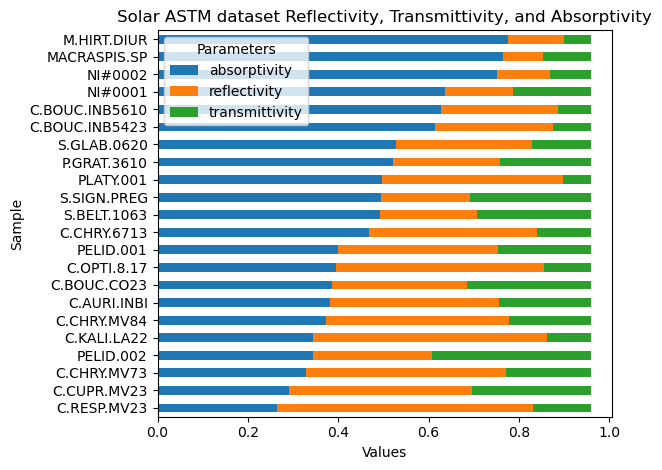

In [31]:
df = solar_optical_properties
# Set the index to 'sample' column
df.set_index('sample', inplace=True)

# Select columns for plotting
columns_to_plot = ['absorptivity','reflectivity',  'transmittivity']

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
df[columns_to_plot].sort_values(by="absorptivity", ascending=True).plot(kind='barh', stacked=True)

# Add labels and title
plt.ylabel('Sample')
plt.xlabel('Values')
plt.title('Solar '+ solar_dataset_used + ' Reflectivity, Transmittivity, and Absorptivity')

# Show plot
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

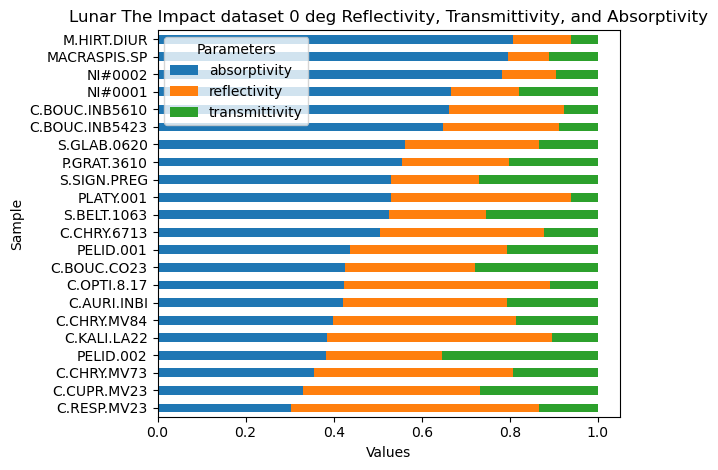

In [32]:
df = lunar_optical_properties
# Set the index to 'sample' column
df.set_index('sample', inplace=True)

# Select columns for plotting
columns_to_plot = ['absorptivity','reflectivity' ,'transmittivity']

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
df[columns_to_plot].sort_values(by="absorptivity", ascending=True).plot(kind='barh', stacked=True)

# Add labels and title
plt.ylabel('Sample')
plt.xlabel('Values')
plt.title('Lunar '+ lunar_dataset_used + ' Reflectivity, Transmittivity, and Absorptivity')

# Show plot
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

In [33]:
df = optical_properties
# Set the index to 'sample' column
#df.set_index('sample', inplace=True)

# Select columns for plotting
columns_to_plot = ['uv_reflectivity', 'uv_transmitivity', 'uv_absorptivity']

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
df[columns_to_plot].sort_values(by="uv_reflectivity", ascending=True).plot(kind='barh', stacked=True)

# Add labels and title
plt.ylabel('Sample')
plt.xlabel('Values')
plt.title('Reflectivity, Transmitivity, and Absorptivity for UV range')

# Show plot
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['uv_reflectivity', 'uv_transmitivity', 'uv_absorptivity'], dtype='object')] are in the [columns]"

<Figure size 1000x600 with 0 Axes>

In [ ]:
df = optical_properties

# Select columns for plotting
columns_to_plot = ['vis_reflectivity', 'vis_transmitivity', 'vis_absorptivity']

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
df[columns_to_plot].sort_values(by="vis_reflectivity", ascending=True).plot(kind='barh', stacked=True)

# Add labels and title
plt.ylabel('Sample')
plt.xlabel('Values')
plt.title('Reflectivity, Transmitivity, and Absorptivity for VIS range')

# Show plot
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

In [ ]:
df = optical_properties

# Select columns for plotting
columns_to_plot = ['ir_reflectivity', 'ir_transmitivity', 'ir_absorptivity']

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
df[columns_to_plot].sort_values(by="ir_reflectivity", ascending=True).plot(kind='barh', stacked=True)

# Add labels and title
plt.ylabel('Sample')
plt.xlabel('Values')
plt.title('Reflectivity, Transmitivity, and Absorptivity for IR range')

# Show plot
plt.legend(title='Parameters')
plt.tight_layout()
plt.show()

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.lib import colors
import pandas as pd

# Create a sample DataFrame
data = {'A': [1, 2, 3], 'B': ['apple', 'banana', 'orange']}
df = pd.DataFrame(data)

df = reflectivities_df
# Convert DataFrame to a list of lists (data suitable for a table)
data = [df.columns.tolist()] + df.values.tolist()

# Create a PDF file
pdf_filename = 'dataframe_table.pdf'
doc = SimpleDocTemplate(pdf_filename, pagesize=letter)

# Create a table from DataFrame data
table = Table(data)

# Add style to the table
style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                    ('GRID', (0, 0), (-1, -1), 1, colors.black)])

table.setStyle(style)

# Build the PDF
elems = []
elems.append(table)
doc.build(elems)

print(f"PDF file '{pdf_filename}' has been created with the DataFrame table.")